# Google Play Store Analysis

### Problem Statement:

Technology is the increasing need nowadays and used everywhere. One of the features of Technology is android. Which we all use in our daily life. Android is a mobile operating system based on a modified version of the Linux kernel and other open source software, designed primarily for touchscreen mobile devices such as smartphones and tablets. Do ETL : Extract-Transform-Load the dataset and find for me some information from this large data. This is form of data mining. What all information can be achieved by mining this data, would be brainstormed by the interns Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.
### Dataset:
The dataset on the given link
https://drive.google.com/drive/folders/1FkmFVL8wlJmQWP1z52TD8PlhOJhitTyI?usp=sharing

### Approach:

- Python
- Tableau

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt         #for visualization
import seaborn as sns

import warnings                         #to ignore warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)  
pd.set_option('display.width', 1000)

sns.set(color_codes=True)              #color_code

## Reading Dataset

In [2]:
inp0 = pd.read_csv('googleplaystore.csv')

In [3]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.shape

(10841, 13)

There are 10841 rows and 13 columns in the dataset

In [5]:
inp0.info()                #checking data dtype of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Missing Values Imputation:

Missing Data count for each column in playstore dataset

In [6]:
inp0.isnull().sum()       #missing data count in each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
round(inp0.isnull().sum() / inp0.shape[0] * 100,2)         #missing data in percentage

App                0.00
Category           0.00
Rating            13.60
Reviews            0.00
Size               0.00
Installs           0.00
Type               0.01
Price              0.00
Content Rating     0.01
Genres             0.00
Last Updated       0.00
Current Ver        0.07
Android Ver        0.03
dtype: float64

As you can observe, there are only one column **Rating** which has 13 % missing data and other columns have significantly less missing data. Therefore, I will dropping rows for less missing data such as 'Type', 'Content Rating' columns. Dropping very few rows won't affect analysis.

In [8]:
inp0 = inp0[~inp0.Type.isnull()].copy()                          #dropping NA in Type column
inp0 = inp0[~inp0['Content Rating'].isnull()].copy()             #dropping NA in Content Rating column

In [9]:
inp0['Current Ver'].value_counts()

Varies with device    1458
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [10]:
inp0['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Imputing missing data in Current Ver and Android Ver columns as they are categorical variables.

In [11]:
inp0['Current Ver'] = inp0['Current Ver'].fillna(inp0['Current Ver'].mode()[0])       #imputing NA using mode()
inp0['Android Ver'] = inp0['Android Ver'].fillna(inp0['Android Ver'].mode()[0])

In [12]:
inp0.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Seems like Rating variable is discrete and having outliers, therefore imputing missing data using median.

In [13]:
inp0.Rating = inp0.Rating.fillna(inp0.Rating.median())                 #imputing NA using median()

In [14]:
inp0.Reviews.describe()

count     10839
unique     6001
top           0
freq        595
Name: Reviews, dtype: object

Modifying the data type of Reviews columns to INT64 

In [15]:
inp0.Reviews = inp0.Reviews.astype('int64')      #changing the data type of Reviews

In [16]:
round(inp0.Reviews.describe(),2)

count       10839.00
mean       444193.87
std       2927892.56
min             0.00
25%            38.00
50%          2094.00
75%         54783.00
max      78158306.00
Name: Reviews, dtype: float64

Plotting distribution and boxplot of Reviews column

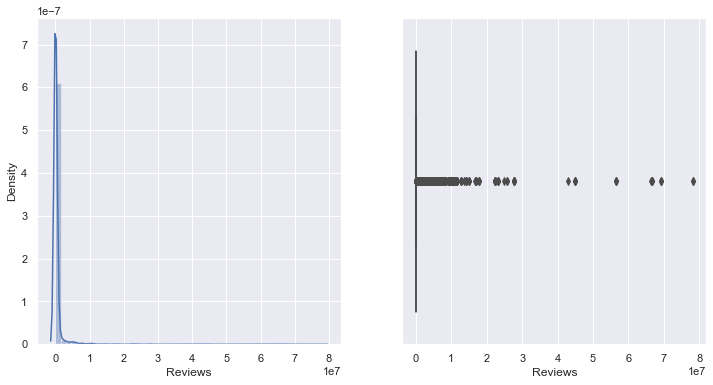

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(inp0.Reviews)       #Reviews distribution

plt.subplot(1,2,2)
sns.boxplot(inp0.Reviews)     #for outliers, I am not treating the outliers but will ignore these for analysys
plt.show()

Installs column is numerical in nature however because of '+' sign it has read as object data type in pandas dataframe.

In [18]:
inp0.Installs.value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

Therefore, removing '+' sign from the Installs columns as it won't affect anything and is reduntant. So that Installs can be modified into INT64

In [19]:
inp0.Installs = inp0.Installs.apply(lambda x: x.replace("+","").replace(",",""))       #removing "+"
inp0.Installs = inp0.Installs.astype('int64')

In [20]:
inp0.Price.value_counts()

0          10039
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$24.99         7
$3.49          7
$7.99          7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$12.99         5
$8.99          5
$10.00         3
$16.99         3
$1.00          3
$2.00          3
$13.99         2
$8.49          2
$17.99         2
$1.70          2
$3.95          2
$79.99         2
$7.49          2
$9.00          2
$10.99         2
$39.99         2
$33.99         2
$1.96          1
$19.40         1
$4.80          1
$3.28          1
$4.59          1
$15.46         1
$3.04          1
$4.29          1
$2.60          1
$2.59          1
$3.90          1
$154.99        1
$4.60          1
$28.99         1
$2.95          1
$2.90          1
$1.97          1
$200.00        1
$89.99         1
$2.56         

Seems like Price column is having the same issue, It needs to be fixed. Therefore removing '$' sign and taking rounded values.

In [21]:
inp0.Price = inp0.Price.apply(lambda x: float(x.replace("$","")))       # removing "$"

In [22]:
inp0.Price = inp0.Price.apply(lambda x: int(round(x)))              #changing data type into INT

In [23]:
inp0['Last Updated'].value_counts()

August 3, 2018       326
August 2, 2018       304
July 31, 2018        294
August 1, 2018       285
July 30, 2018        211
                    ... 
March 8, 2015          1
March 25, 2015         1
December 17, 2013      1
October 11, 2014       1
March 23, 2014         1
Name: Last Updated, Length: 1377, dtype: int64

Extracting the year from Last Updated column as It will be useful for our further analysis.

In [24]:
inp0['last_updated'] = pd.DatetimeIndex(inp0['Last Updated']).year

In [25]:
inp0['Current Ver'].value_counts()

Varies with device    1466
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

In [26]:
inp0['Android Ver'].value_counts()

4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [27]:
inp0.Size.value_counts()

Varies with device    1694
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 461, dtype: int64

Handling Errors in Size column as there are some values in M and some of them are in k, So converting 'k' values in 'm'.

In [28]:
def size_(inp):
    if 'M' in inp:
        return float(inp.replace('M',''))
    elif 'k' in inp:
        return round(float(inp.replace('k',''))/1000,2)
    else:
        return inp

In [29]:
inp0.Size = inp0.Size.apply(size_)

In [30]:
inp0['Android Ver'].value_counts()

4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1361
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

I feel Android Ver column is not very significant for our analysis, therefore I am just fixing range values in this case.

In [31]:
def and_ver(inp):
    if '-' in inp:
        return inp.split('-')[0] + 'and up'
    else:
        return inp

In [32]:
inp0['Android Ver'] = inp0['Android Ver'].apply(and_ver)

### Treating Duplicated Data

In [33]:
inp0.duplicated().sum()

483

In [34]:
inp0.App.duplicated().sum()

1181

Some apps having duplicated rows because of their category, Therefore dropping the duplicated rows and keeping the first value 

In [35]:
inp0.drop_duplicates(subset=(['App', 'Category']), keep='first', inplace=True)

### Univariate Analysis

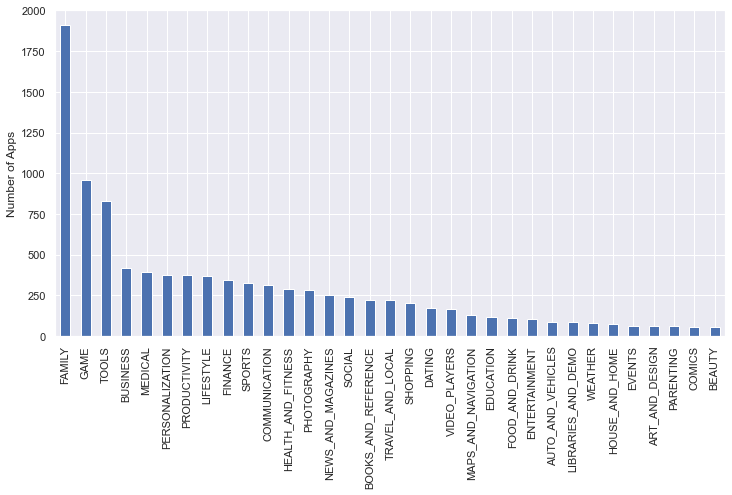

In [36]:
plt.figure(figsize=(12,6))
inp0.Category.value_counts().plot.bar()
plt.ylabel('Number of Apps')
plt.show()

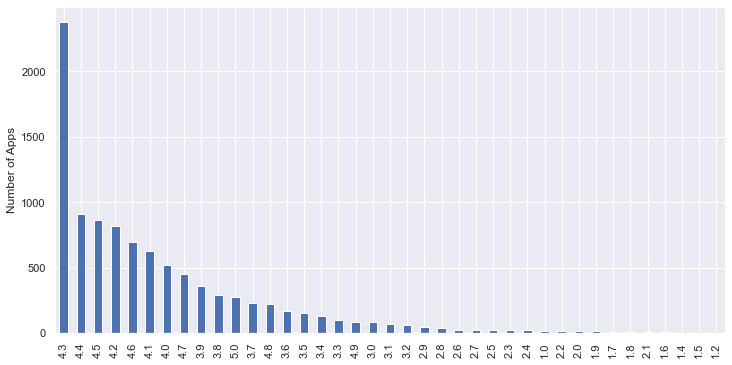

In [37]:
plt.figure(figsize=(12,6))
inp0.Rating.value_counts().plot.bar()
plt.ylabel('Number of Apps')
plt.show()

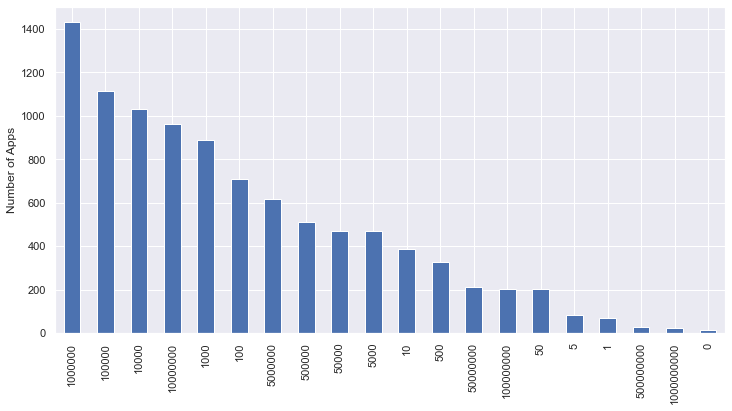

In [38]:
plt.figure(figsize=(12,6))
inp0.Installs.value_counts().plot.bar()
plt.ylabel('Number of Apps')
plt.show()

In [39]:
type_col = round(inp0.Type.value_counts(normalize=True)*100)
type_col

Free    92.0
Paid     8.0
Name: Type, dtype: float64

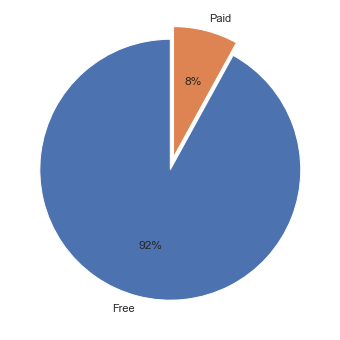

In [40]:
plt.figure(figsize=(12,6))
plt.pie(type_col, labels=['Free', 'Paid'], autopct='%.0f%%', startangle=90, explode=(0,0.1))
plt.show()

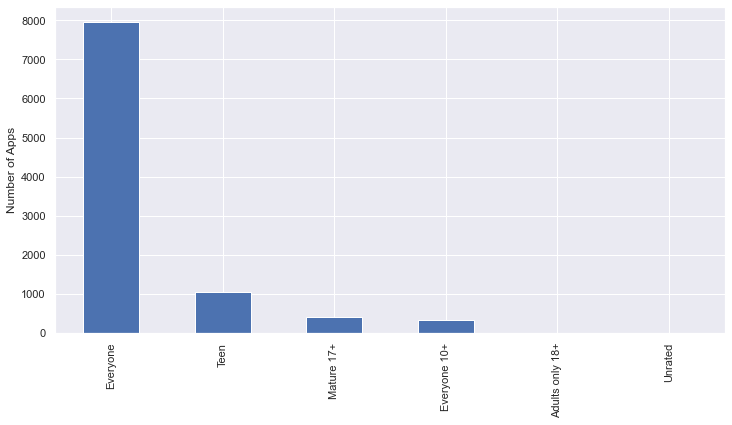

In [41]:
plt.figure(figsize=(12,6))
inp0['Content Rating'].value_counts().plot.bar()
plt.ylabel('Number of Apps')
plt.show()

In [42]:
top_genres = inp0['Genres'].value_counts()

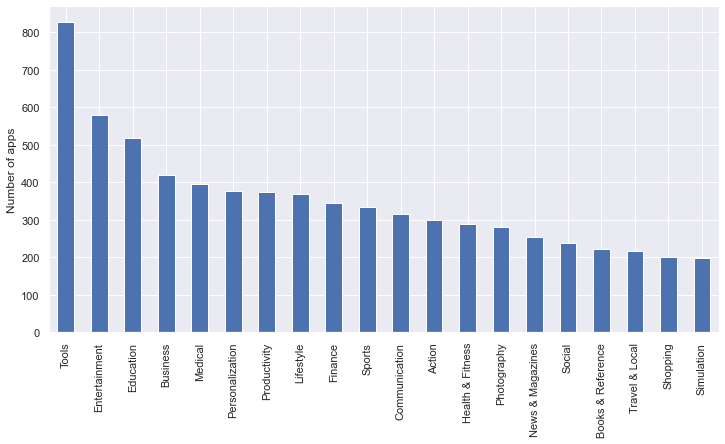

In [43]:
plt.figure(figsize=(12,6))
top_genres.head(20).plot.bar()         #top 10 genres based on total number of apps
plt.ylabel('Number of apps')
plt.show()

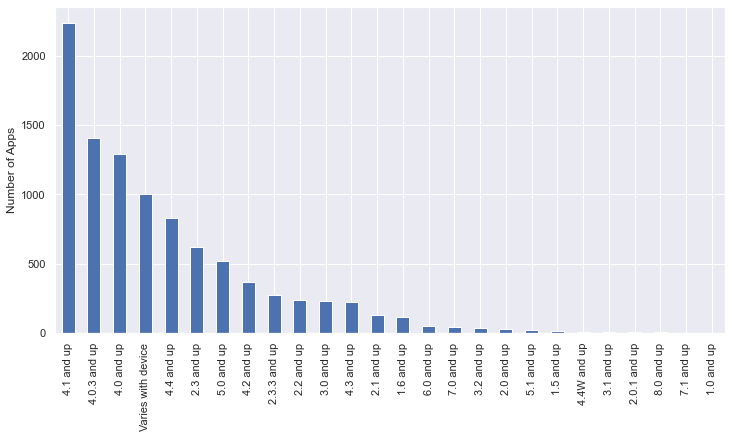

In [44]:
plt.figure(figsize=(12,6))
inp0['Android Ver'].value_counts().plot.bar()
plt.ylabel('Number of Apps')
plt.show()

### Numerical Variables

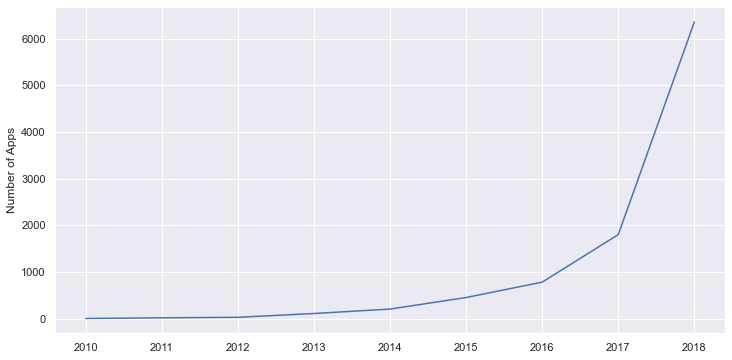

In [45]:
plt.figure(figsize=(12,6))
inp0.last_updated.value_counts().plot()
plt.ylabel('Number of Apps')
plt.show()

In [46]:
inp0.Price.describe()

count    9743.000000
mean        1.086729
std        16.779811
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

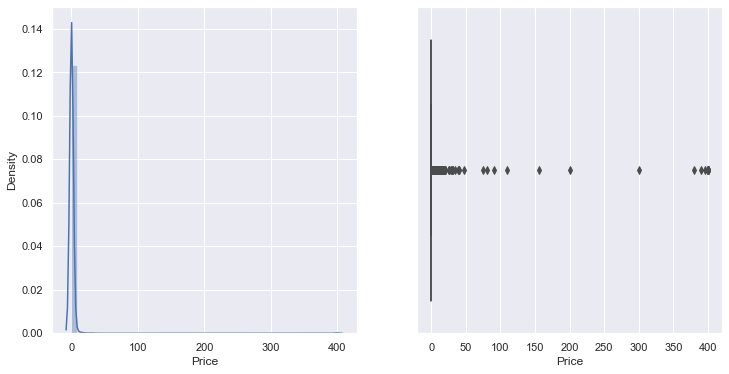

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(inp0.Price)
plt.subplot(1,2,2)
sns.boxplot(inp0.Price)
plt.show()

**Observations:**

- Family, Game and Tools are the top three categories which are having the highest number of apps.
- Around 24% apps having rating of 4.3, followed by 4.4 and 4.5 which are having apps around 9%.
- There are 92% free apps and only 8% paid apps in the data.
- Around 24% of apps support 'Android 4.1 and above'.
- Seems like Year can be significant for analysis as trend seen in the graph, number of apps were highest in 2018 year.
- There are very few apps for 'teen' & '17 plus'. Most of them are for Everyone Content Rating.
- Around 15% apps have been installed 1 million times
- Max Price is $ 400 but they are very few

### Bivariate Analysis

Top Apps based on highest number of Installs

In [48]:
top_apps = inp0[inp0.Installs == inp0.Installs.max()]

Top Apps based on highest number of Installs and Rating

In [49]:
top_apps.sort_values(by='Rating', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last_updated
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,1000000000,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,2018
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,2018
2808,Google Photos,PHOTOGRAPHY,4.5,10858556,Varies with device,1000000000,Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,2018
3454,Google Drive,PRODUCTIVITY,4.4,2731171,Varies with device,1000000000,Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,2018
3234,Google,TOOLS,4.4,8033493,Varies with device,1000000000,Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,2018
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,2018
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,2018
5856,Google Play Games,FAMILY,4.3,7168735,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,2018
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,2018


Top Categories based on total number of Installs

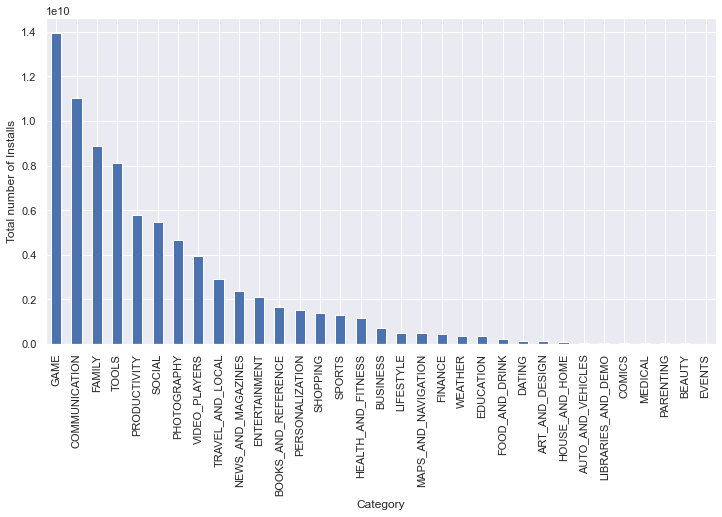

In [50]:
plt.figure(figsize=(12,6))
inp0.groupby('Category').Installs.sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total number of Installs')
plt.show()

Categories based on median Rating:

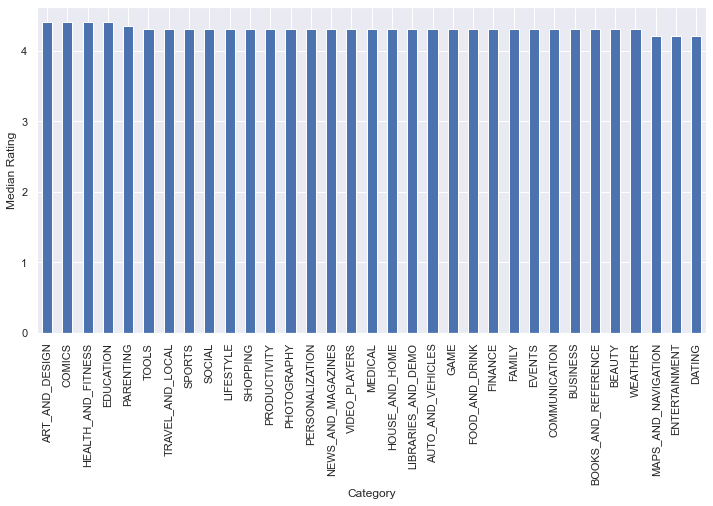

In [51]:
plt.figure(figsize=(12,6))
inp0.groupby('Category').Rating.median().sort_values(ascending=False).plot.bar()
plt.ylabel('Median Rating')
plt.show()

Categories based on their total Price:

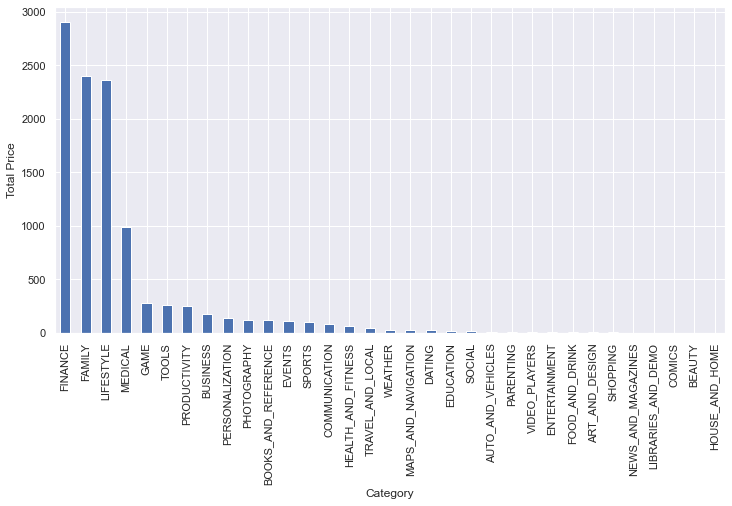

In [52]:
plt.figure(figsize=(12,6))
inp0.groupby('Category').Price.sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total Price')
plt.show()

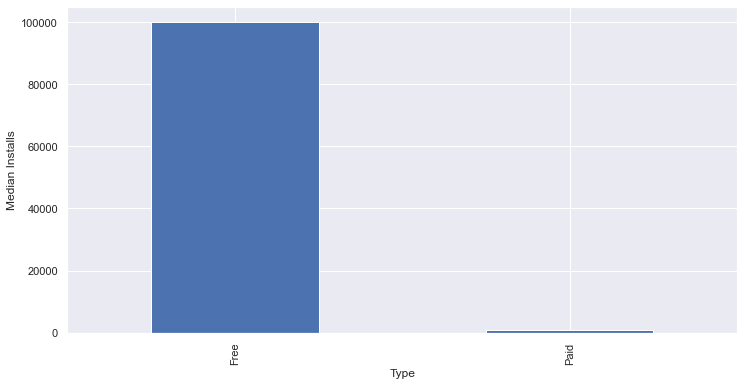

In [53]:
plt.figure(figsize=(12,6))
inp0.groupby('Type').Installs.median().sort_values(ascending=False).plot.bar()
plt.ylabel('Median Installs')
plt.show()

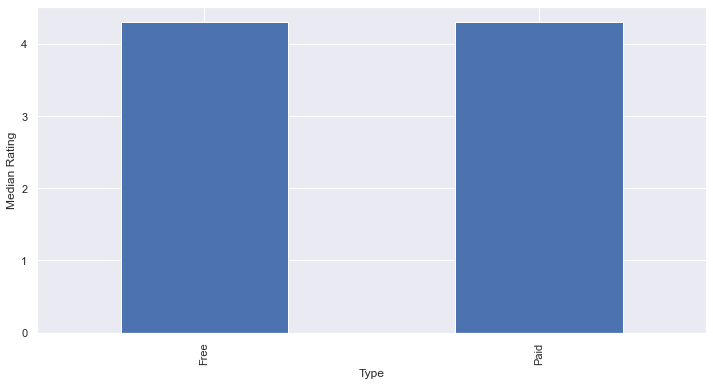

In [54]:
plt.figure(figsize=(12,6))
inp0.groupby('Type').Rating.median().sort_values(ascending=False).plot.bar()
plt.ylabel('Median Rating')
plt.show()

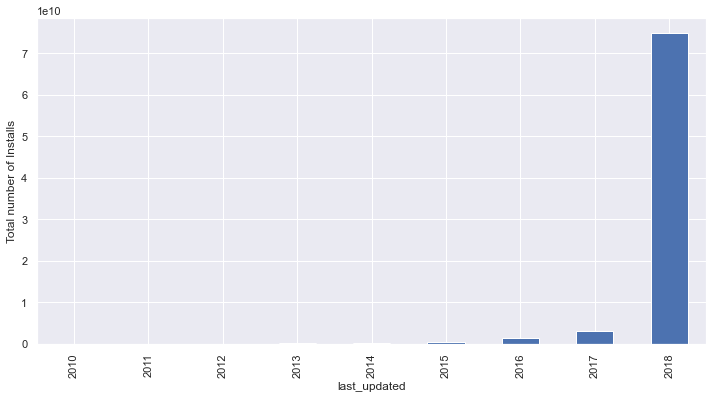

In [55]:
plt.figure(figsize=(12,6))
inp0.groupby('last_updated').Installs.sum().plot.bar()
plt.ylabel('Total number of Installs')
plt.show()

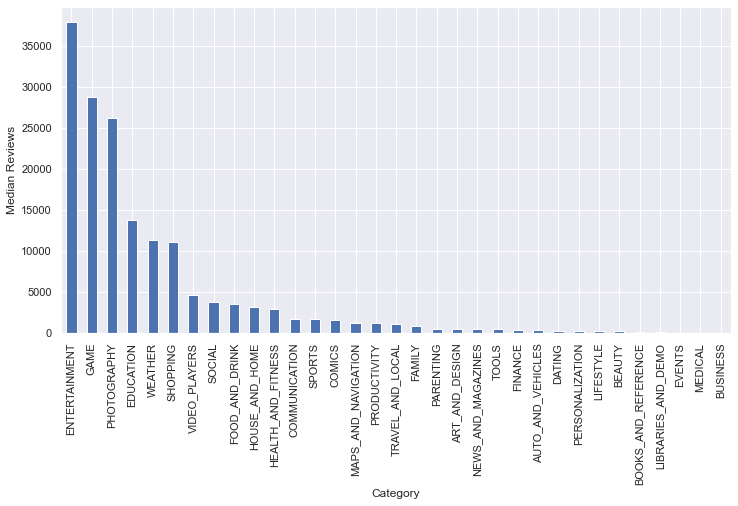

In [56]:
plt.figure(figsize=(12,6))
inp0.groupby('Category').Reviews.median().sort_values(ascending=False).plot.bar()
plt.ylabel('Median Reviews')
plt.show()

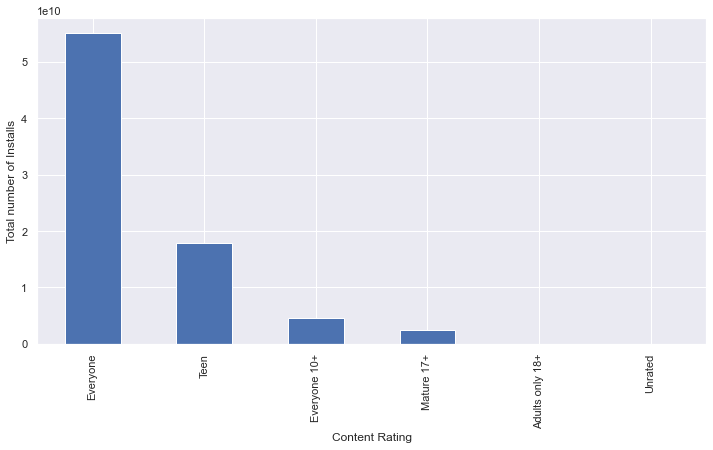

In [57]:
plt.figure(figsize=(12,6))
inp0.groupby('Content Rating').Installs.sum().sort_values(ascending=False).plot.bar()
plt.ylabel('Total number of Installs')
plt.show()

### Correlation Matrix:

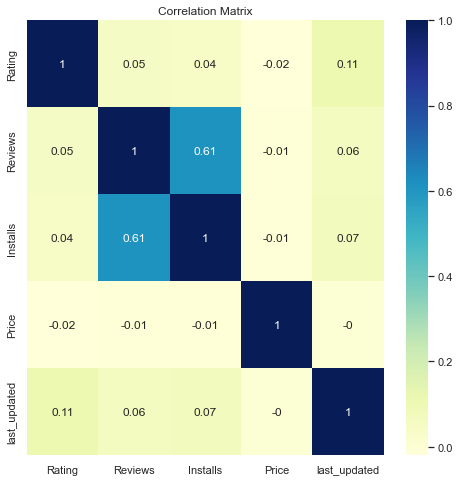

In [58]:
plt.figure(figsize = (8,8))
sns.heatmap(round(inp0.corr(),2), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

**Observations**:

- Top Apps having highest number of installs and highest rating are: Instagram, Subway Surfers, Google Photos, WhatsApp, Google Drive, Youtube.
- Game, communication & Family are the top three categories based on total number of Installs.
- Finance, Family & Lifestyle are the top three categories based on total price.
- Most of the installed apps are Free.
- Entertainment, Game & Photography are having the highest average number of reviews.
- In 2018, there were highest number of Installs.

**Reviews - Installs are correlated to each other**

**Thank You!**
